In [22]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [23]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("ETTh1")

OT


In [19]:
data.shape

(1, 17420, 8)

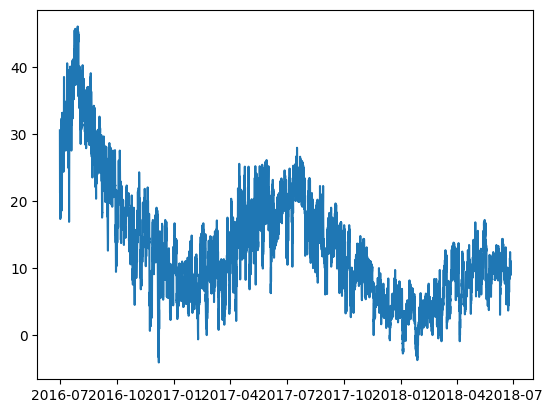

In [31]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [15]:
data1.shape

(17420, 1)

In [4]:
data.shape

(1, 17420, 8)

In [5]:
data[0][:, 1]

array([-1.66132477, -1.51686175, -1.37239873, ...,  0.79454663,
        0.93900965,  1.08347268])

In [17]:
train_data = data1[:, train_slice]

InvalidIndexError: (slice(None, None, None), slice(None, 8640, None))

In [8]:
train_data.shape

(1, 8640, 8)

In [109]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data,
    device="cpu",
    #output_dims=320
    output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True
)

TypeError: empty(): argument 'size' must be tuple of ints, but found element of type numpy.ndarray at pos 2

In [11]:
model.save(f'ETTh1_OT.pkl')

In [12]:
all_repr = model.encode(
        data,
        causal=True,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

In [13]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-0.20259681 -0.02850973 -0.60829777 ...  2.0219703   1.310743
    0.9781084 ]
  [-0.205431   -0.06665254 -0.6118307  ...  2.039373    1.3395392
    0.9701139 ]
  [-0.19872987 -0.07943169 -0.6067835  ...  2.048856    1.3318669
    0.97556674]
  ...
  [ 1.2508014  -0.5387455  -0.19564621 ...  1.7478104   1.0463197
    0.4708044 ]
  [ 1.2499563  -0.5411892  -0.17472892 ...  1.7307676   1.0626347
    0.47609597]
  [ 1.2502894  -0.5422983  -0.15015936 ...  1.7109872   1.0754288
    0.46816206]]]


In [14]:
test_repr.shape

(1, 2880, 10)

In [24]:
test_2d = test_repr.reshape(2880, 10)

In [25]:
test_2d

array([[-0.20259681, -0.02850973, -0.60829777, ...,  2.0219703 ,
         1.310743  ,  0.9781084 ],
       [-0.205431  , -0.06665254, -0.6118307 , ...,  2.039373  ,
         1.3395392 ,  0.9701139 ],
       [-0.19872987, -0.07943169, -0.6067835 , ...,  2.048856  ,
         1.3318669 ,  0.97556674],
       ...,
       [ 1.2508014 , -0.5387455 , -0.19564621, ...,  1.7478104 ,
         1.0463197 ,  0.4708044 ],
       [ 1.2499563 , -0.5411892 , -0.17472892, ...,  1.7307676 ,
         1.0626347 ,  0.47609597],
       [ 1.2502894 , -0.5422983 , -0.15015936, ...,  1.7109872 ,
         1.0754288 ,  0.46816206]], dtype=float32)

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
import numpy as np
data_test=data1[11520:14400]

In [52]:
data_test.shape

(2880, 1)

In [94]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [95]:
dbscan.fit(test_2d)
labels = dbscan.labels_

In [96]:
labels

array([ 0,  0,  0, ..., 24, 24, 24])

In [97]:
len(labels)

2880

In [99]:
date=data_test.index
date_list=date.tolist()

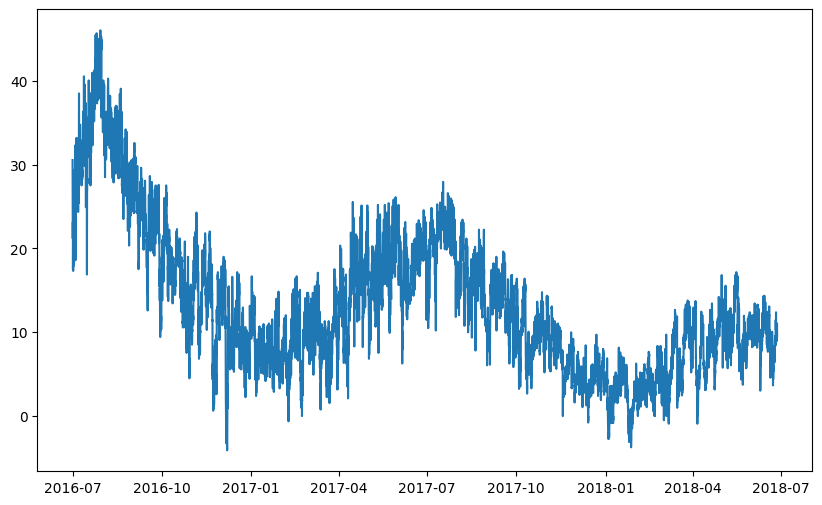

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(data1)  # cパラメータにクラスタラベルを渡す
plt.show()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_92767/1696500125.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


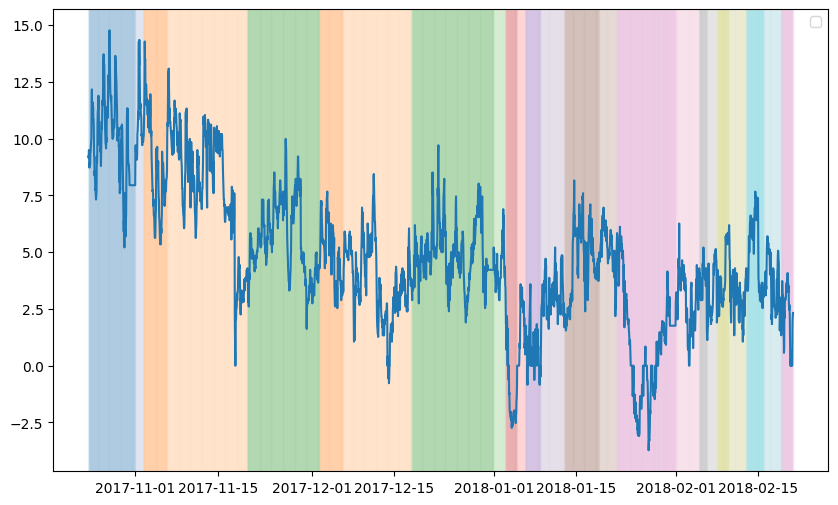

In [102]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.05)
plt.legend() 
plt.show()
# # ラベルの一覧を取得します
# unique_labels = np.unique(labels)
# plt.figure(figsize=(10, 6))
# # 各ラベルごとにプロットします
# for label in unique_labels:
#     plt.plot(data_test[labels == label], label=f'Cluster {label}')

# #plt.legend()  # 凡例を表示します
# plt.show()

In [103]:
data1.shape

(17420, 1)

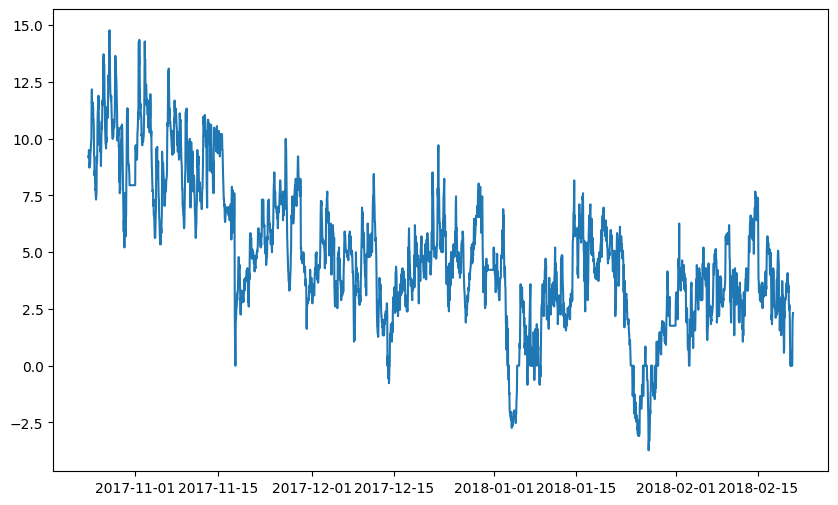

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
plt.show()

In [104]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_92767/4027387395.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


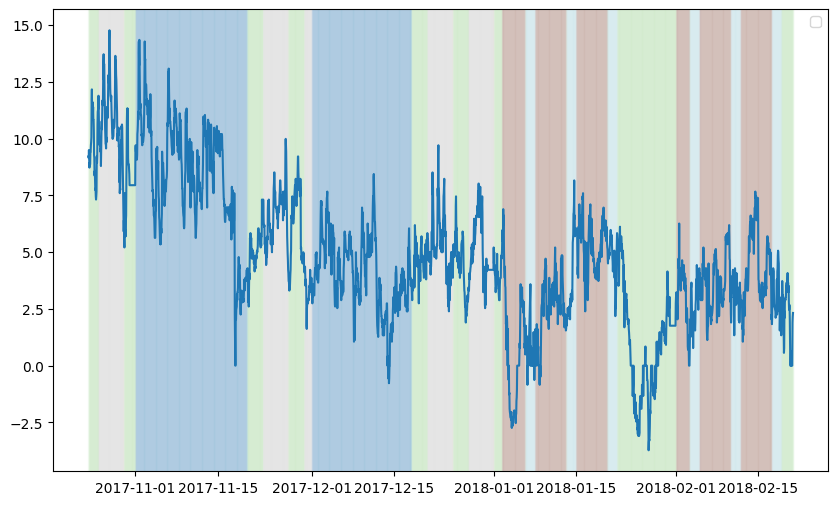

In [105]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.05)
plt.legend() 
plt.show()

In [106]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=5)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_92767/4027387395.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


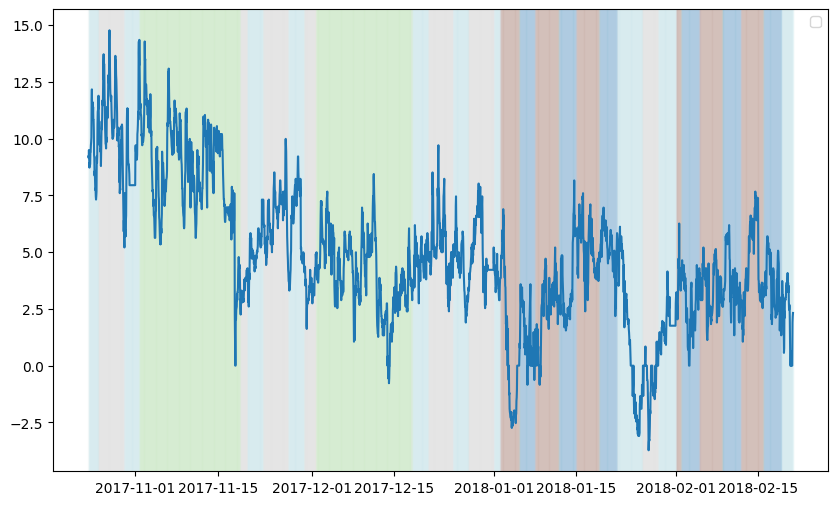

In [107]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.05)
plt.legend() 
plt.show()

In [86]:
data_mocap = pd.read_csv("datasets/mocap/No1.csv.gz")
data_mocap

,x1,x2,x3,x4
0,-30.8789,-30.7658,0.978633,-2.24822
1,-31.1088,-30.7255,0.681935,-2.27731
2,-31.4550,-30.9937,1.026770,-2.30793
3,-31.5504,-30.9791,1.471260,-2.45257
4,-31.7029,-30.9148,1.879720,-2.85789
...,...,...,...,...
1280,-24.9045,-17.3608,0.919950,-1.87422
1281,-25.0263,-17.4007,0.915933,-1.75358
1282,-25.4919,-17.8265,1.021980,-1.77927
1283,-25.4646,-17.6569,1.008800,-1.81312


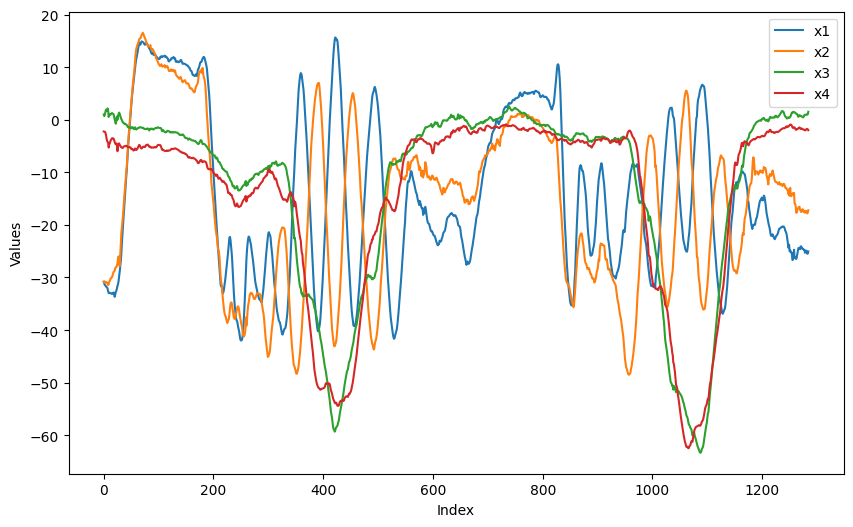

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(data_mocap['x1'], label='x1')
plt.plot(data_mocap['x2'], label='x2')
plt.plot(data_mocap['x3'], label='x3')
plt.plot(data_mocap['x4'], label='x4')
plt.xlabel('Index')
plt.ylabel('Values')

# 凡例の追加
plt.legend()

# グラフを表示
plt.show()

In [90]:
# インデックスの日時範囲を作成
date_range = pd.date_range(start='2012-01-01 00:00:00', periods=len(data_mocap), freq='H')
data_mocap["date"]=date_range
# データフレームの作成


In [91]:
data_mocap

,x1,x2,x3,x4,date
0,-30.8789,-30.7658,0.978633,-2.24822,2012-01-01 00:00:00
1,-31.1088,-30.7255,0.681935,-2.27731,2012-01-01 01:00:00
2,-31.4550,-30.9937,1.026770,-2.30793,2012-01-01 02:00:00
3,-31.5504,-30.9791,1.471260,-2.45257,2012-01-01 03:00:00
4,-31.7029,-30.9148,1.879720,-2.85789,2012-01-01 04:00:00
...,...,...,...,...,...
1280,-24.9045,-17.3608,0.919950,-1.87422,2012-02-23 08:00:00
1281,-25.0263,-17.4007,0.915933,-1.75358,2012-02-23 09:00:00
1282,-25.4919,-17.8265,1.021980,-1.77927,2012-02-23 10:00:00
1283,-25.4646,-17.6569,1.008800,-1.81312,2012-02-23 11:00:00


In [93]:
data_mocap.to_csv('datasets/mocap.csv',index=False)